In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure

In [13]:
base_table = pd.read_csv(r'C:\Users\vrajagopalan\OneDrive - IESEG\Desktop\Financial Programming\FP_GroupProject_GroupXX\data\processed\processed_table.csv')

In [14]:
analysis_df = base_table[base_table['account_year'] < 1997]

# ACCOUNT ANALYSIS

Number of accounts opened based on years and gender

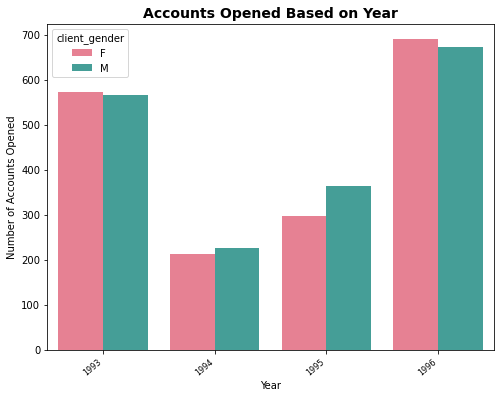

In [15]:
#Number of accounts opened based on years and gender

plt.figure(figsize=(8,6))
ax = sns.countplot(x='account_year', hue ='client_gender', data=analysis_df,palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Accounts Opened Based on Year', fontsize=14, fontweight='bold')
ax.set(xlabel='Year', ylabel='Number of Accounts Opened')
plt.show()

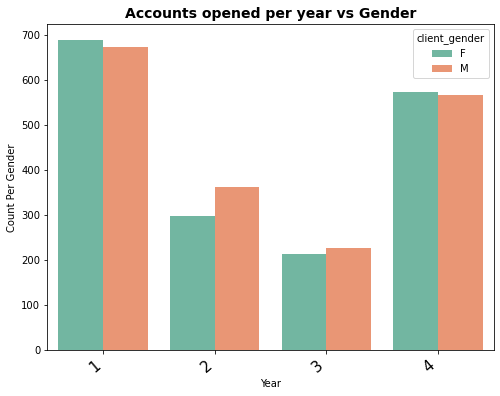

In [16]:
#This plot seems wrong. Remove it 
#how can an account be opened if the customer is already in relationship with the bank. SO account opening in LOR = 2,3,4 wrong



plt.figure(figsize=(8,6))
ax = sns.countplot(x='account_lor', hue ='client_gender', data=analysis_df,palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=15)
plt.title('Accounts opened per year vs Gender', fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Count Per Gender")
plt.show()

<AxesSubplot:title={'center':'Accounts Created based on Months'}, xlabel='Month', ylabel='Accounts Created'>

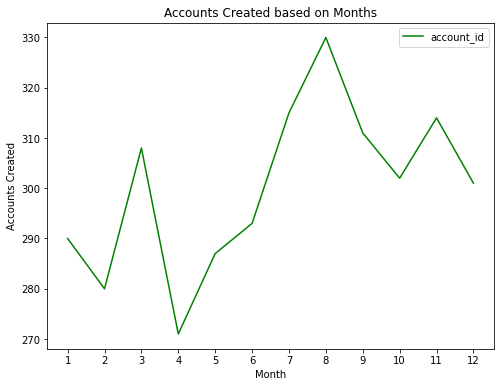

In [17]:
#Accounts Created based on Months

acc_plot1 = pd.DataFrame(analysis_df.groupby('account_month')['account_id'].count())
acc_plot1.plot(xlabel='Month', ylabel='Accounts Created', title='Accounts Created based on Months', figsize=(8,6), color='green', xticks=range(1,13))

<AxesSubplot:title={'center':'Card Issued Based on Account Length of relationship'}, xlabel='Length of Relationship in Years', ylabel='Cards Issued'>

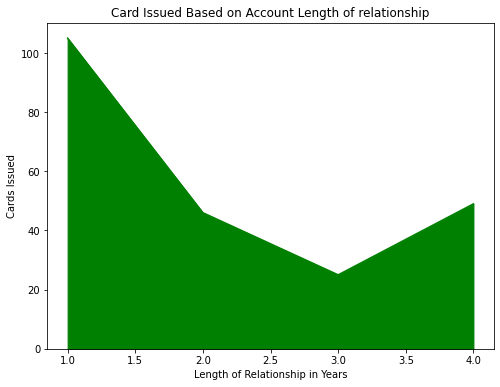

In [18]:
#Cards Issued Based on Account Length of Relationship

acc_plot2 = analysis_df.groupby('account_lor')['card_issued_97'].sum()
acc_plot2.plot(xlabel='Length of Relationship in Years', ylabel='Cards Issued', title='Card Issued Based on Account Length of relationship', figsize=(8,6), color='green', kind="area")

<AxesSubplot:title={'center':'Loans granted Based on Account Length of relationship'}, xlabel='Length of Relationship in Years', ylabel='Loan Granted'>

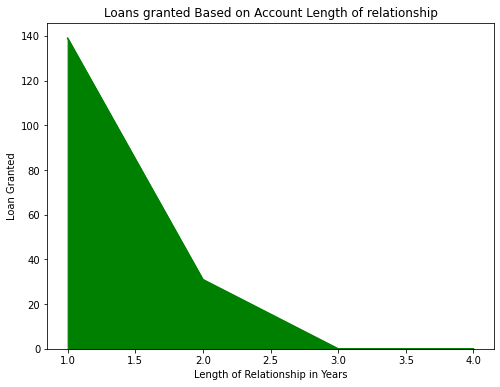

In [19]:
#Cards Issued Based on Account Length of Relationship

acc_plot3 = analysis_df.groupby('account_lor')['loan_granted'].sum()
acc_plot3.plot(xlabel='Length of Relationship in Years', ylabel='Loan Granted', title='Loans granted Based on Account Length of relationship', figsize=(8,6), color='green', kind="area")

# Client Data

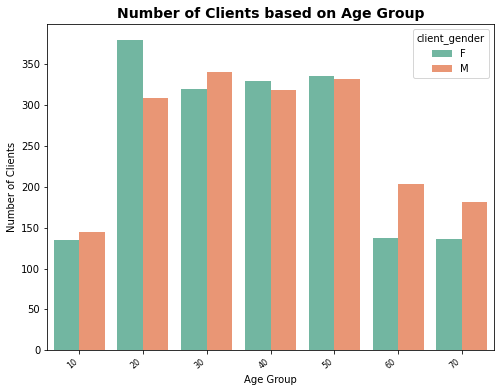

In [20]:
## Plotting histogram with the Age Group and Gender. 
plt.figure(figsize=(8,6))
ax = sns.countplot(x='client_age_group', hue ='client_gender', data=analysis_df,palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.xlabel("Age Group")
plt.ylabel("Number of Clients")
plt.title('Number of Clients based on Age Group', fontsize=14, fontweight='bold')
plt.show()

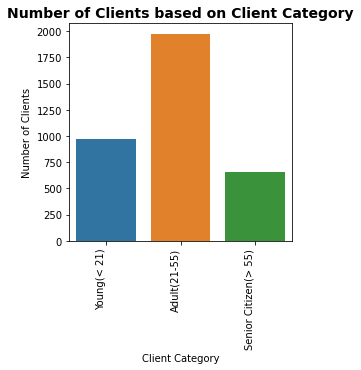

In [22]:
#Number of Clients based on Client Category

plt.figure(figsize=(4,4))
ax = sns.countplot(x='client_category', data=analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
ax.set(xlabel='Client Category',ylabel='Number of Clients')
plt.title('Number of Clients based on Client Category', fontsize=14, fontweight='bold')
plt.show()

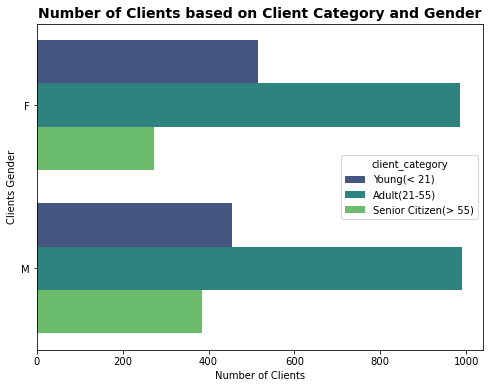

In [23]:
#Number of Clients based on Client Category and Gender

plt.figure(figsize=(8,6))
ax = sns.countplot(y="client_gender", hue="client_category", data=analysis_df,palette="viridis")
plt.title('Number of Clients based on Client Category and Gender', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Clients',ylabel='Clients Gender')
plt.show()


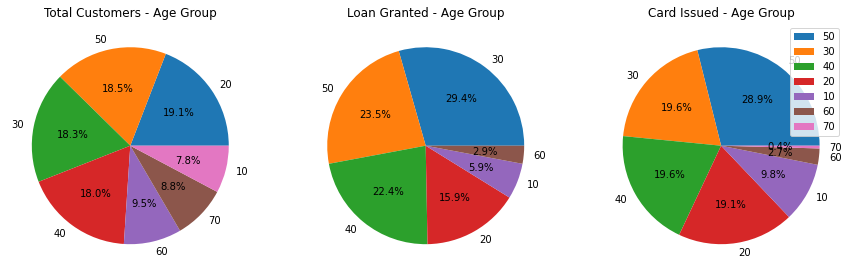

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

cnt_age_group = analysis_df.loc[:]['client_age_group'].value_counts(normalize=True)
ax[0].pie(cnt_age_group, labels=cnt_age_group.index, autopct='%1.1f%%')
ax[0].set_title("Total Customers - Age Group")

cnt_age_group2 = analysis_df.loc[analysis_df['loan_granted'] == 1]['client_age_group'].value_counts(normalize=True)
ax[1].pie(cnt_age_group2, labels=cnt_age_group2.index, autopct='%1.1f%%')
ax[1].set_title("Loan Granted - Age Group")

cnt_age_group3 = analysis_df.loc[analysis_df['card_issued_97'] == 1]['client_age_group'].value_counts(normalize=True)
ax[2].pie(cnt_age_group3, labels=cnt_age_group3.index, autopct='%1.1f%%')
ax[2].set_title("Card Issued - Age Group")
ax[2].legend()

plt.show()

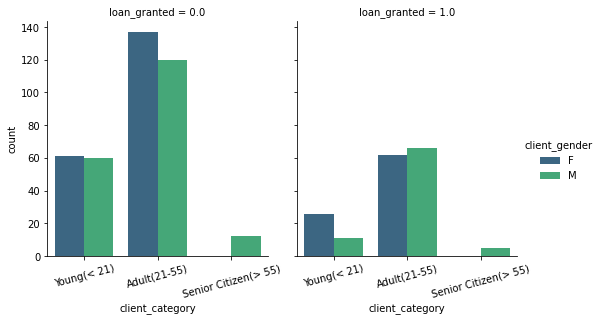

In [25]:
#Client Category vs Loan Granted 

visp = sns.catplot(x="client_category", hue="client_gender", col="loan_granted",
                data=analysis_df, kind="count",
                height=4, aspect=.9,palette="viridis");

visp.set_xticklabels(rotation=15)

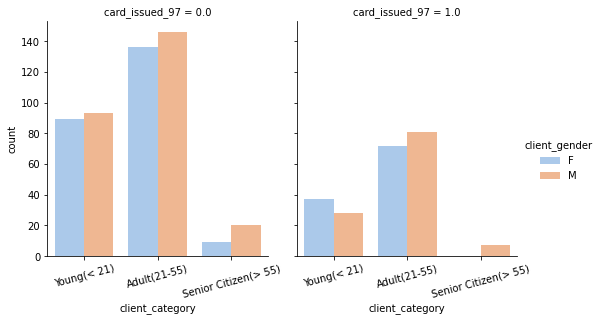

In [26]:
visp1 = sns.catplot(x="client_category", hue="client_gender", col="card_issued_97",
                data=analysis_df, kind="count",
                height=4, aspect=.9,palette = "pastel");
visp1.set_xticklabels(rotation=15)

<AxesSubplot:title={'center':'Loans granted Based on Average Salary'}, xlabel='Average Salary', ylabel='Number of Loans Granted'>

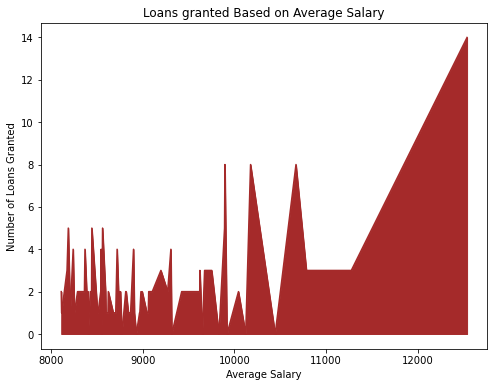

In [27]:
plt_count_card_sal = analysis_df.loc[:].groupby('average_salary')['loan_granted'].sum()
plt_count_card_sal.plot.area(xlabel='Average Salary', ylabel='Number of Loans Granted', title='Loans granted Based on Average Salary', figsize=(8,6), color='brown')

# Clients per District

No handles with labels found to put in legend.


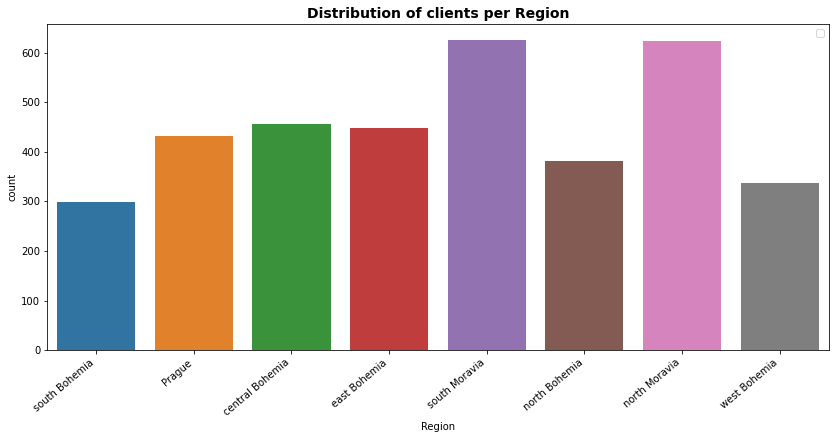

In [28]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Region', data=analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.title('Distribution of clients per Region', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

# Number of clients per district

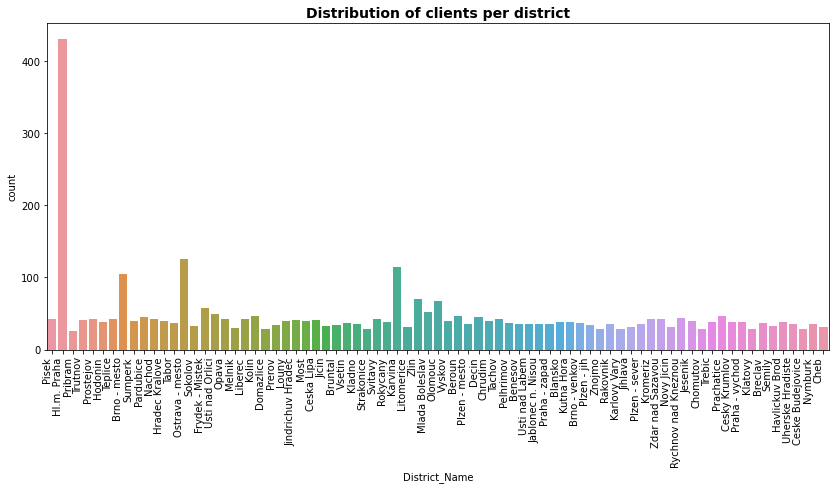

In [29]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='District_Name', data=analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Distribution of clients per district', fontsize=14, fontweight='bold')
plt.show()

# CURRENT LOAN STATUS PER REGION

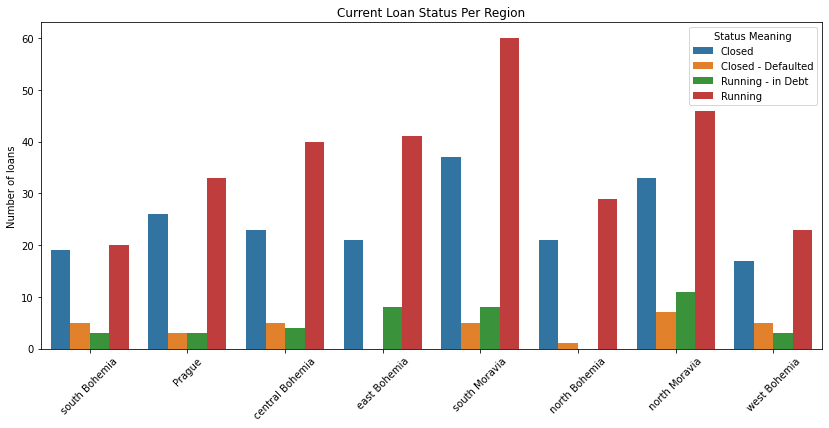

In [30]:

plt.figure(figsize=(14,6))
ax = sns.countplot(x="Region", hue="cur_loan_Status", data=analysis_df)
plt.legend(title="Status Meaning",loc="upper right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Current Loan Status Per Region')
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Loan Amount for the Client Categories')

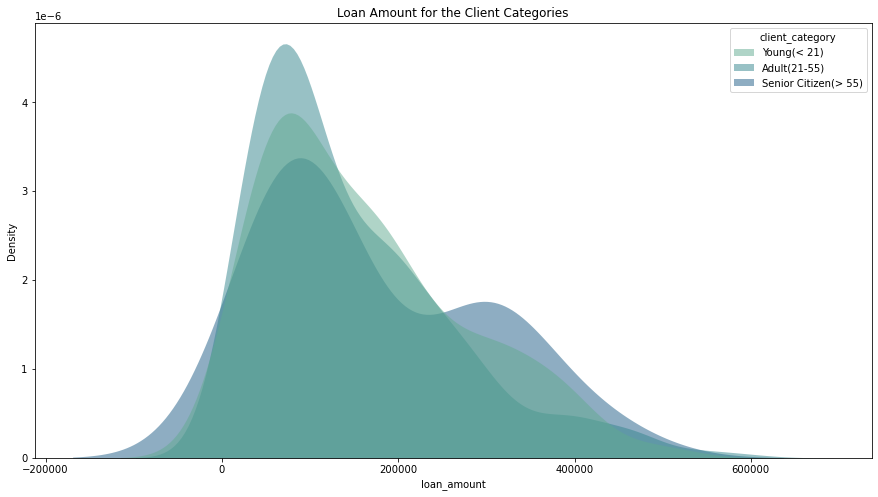

In [31]:
plt.figure(figsize = (15,8))
sns.kdeplot(
   data=analysis_df, x="loan_amount", hue="client_category",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Loan Amount for the Client Categories')

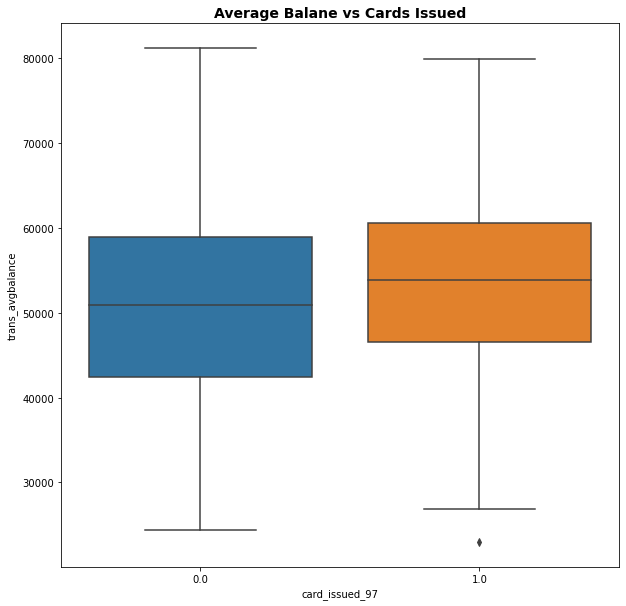

In [32]:
## Plotting average bal over  cards issued

fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='card_issued_97',y='trans_avgbalance', data=analysis_df)
plt.xticks()
ax.set_title('Average Balane vs Cards Issued', fontsize=14, fontweight='bold')

plt.show()

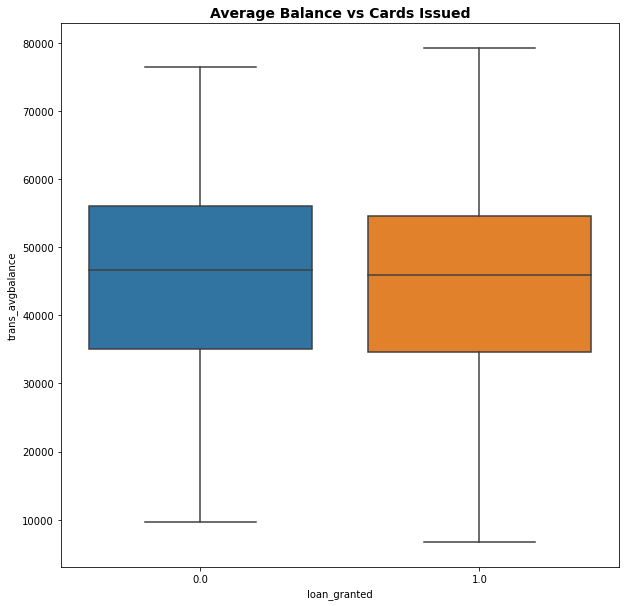

In [33]:
## Plotting average bal over  cards issued

fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='loan_granted',y='trans_avgbalance', data=analysis_df)
plt.xticks()
ax.set_title('Average Balance vs Cards Issued', fontsize=14, fontweight='bold')

plt.show()

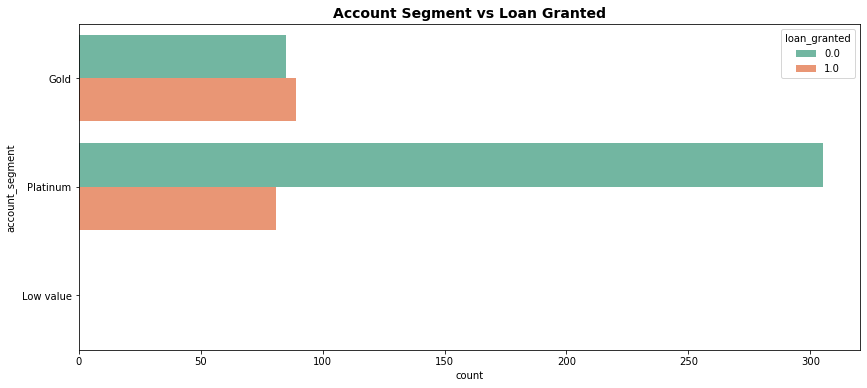

In [34]:
#bar for the Client category vs Gender 
plt.figure(figsize=(14,6))
ax = sns.countplot(y="account_segment", hue="loan_granted", data=analysis_df,palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Account Segment vs Loan Granted', fontsize=14, fontweight='bold')
plt.show()
#ax = sns.countplot(y="gender", hue="client_category", data=client,palette="Set1")

In [35]:
#Taking subset of Loan Granted and not granted

Loan_granted = analysis_df[analysis_df['loan_granted'] == 1]
Loan_notgranted = analysis_df[analysis_df['loan_granted'] != 1]

In [36]:
card_issued = analysis_df[analysis_df['card_issued_97'] == 1]
card_notissued = analysis_df[analysis_df['card_issued_97'] != 1]

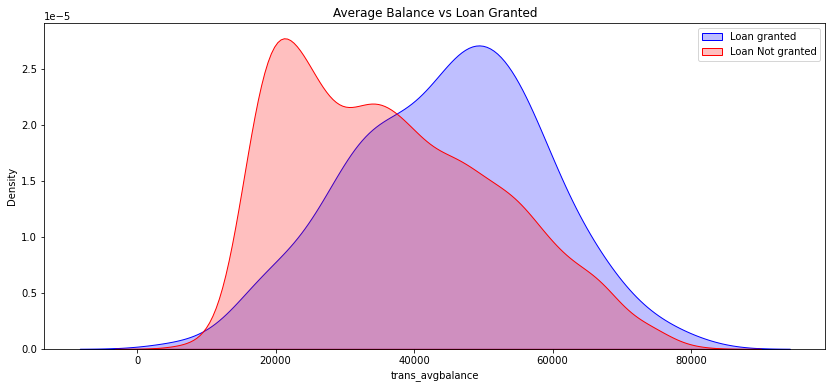

In [37]:
#Loan granted 

plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "b",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('Average Balance vs Loan Granted')
plt.legend()

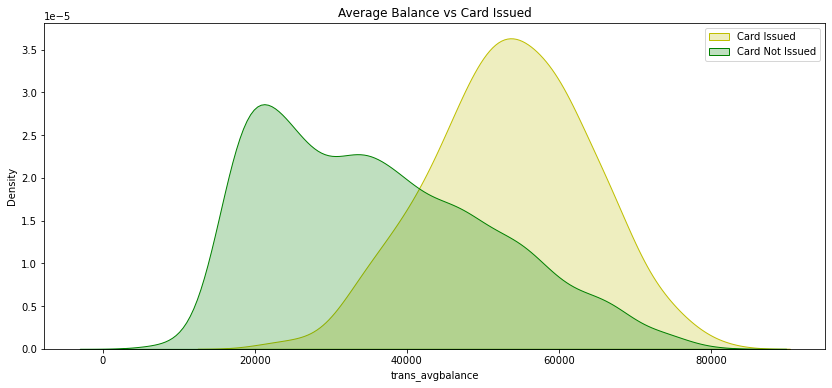

In [57]:
#Card Issued

plt.figure(figsize = (14,6))
sns.kdeplot(card_issued.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "y",label ='Card Issued')
sns.kdeplot(card_notissued.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "g",label ='Card Not Issued')
plt.title('Average Balance vs Card Issued')
plt.legend()

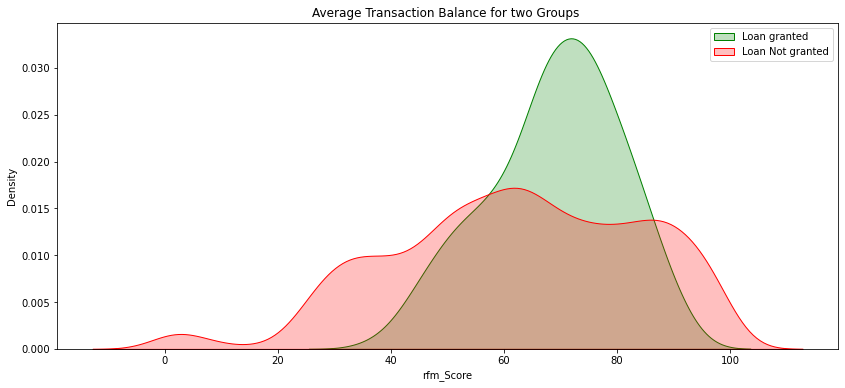

In [58]:
#Loan granted 

plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "g",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('Average Transaction Balance for two Groups ')
plt.legend()

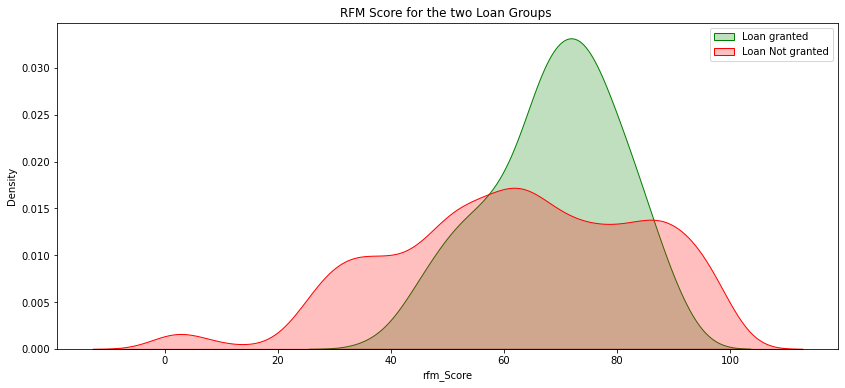

In [59]:
#Loan granted vs RFM Score

plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "g",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('RFM Score for the two Loan Groups ')
plt.legend()

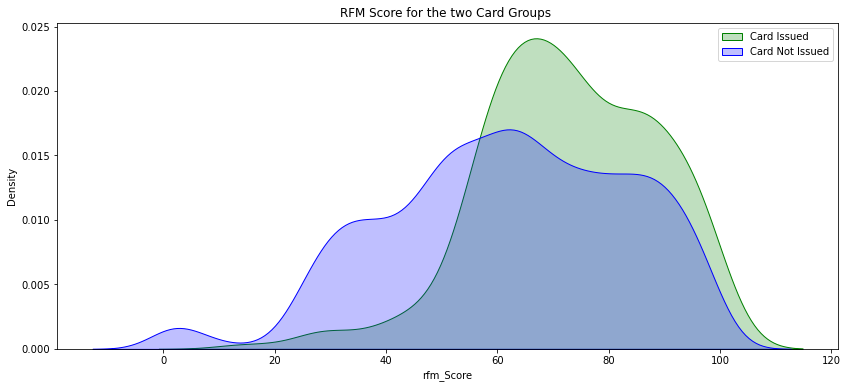

In [60]:
#Card Issued Vs RFM Score 

plt.figure(figsize = (14,6))
sns.kdeplot(card_issued.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "g",label ='Card Issued')
sns.kdeplot(card_notissued.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "b",label ='Card Not Issued')
plt.title('RFM Score for the two Card Groups ')
plt.legend()

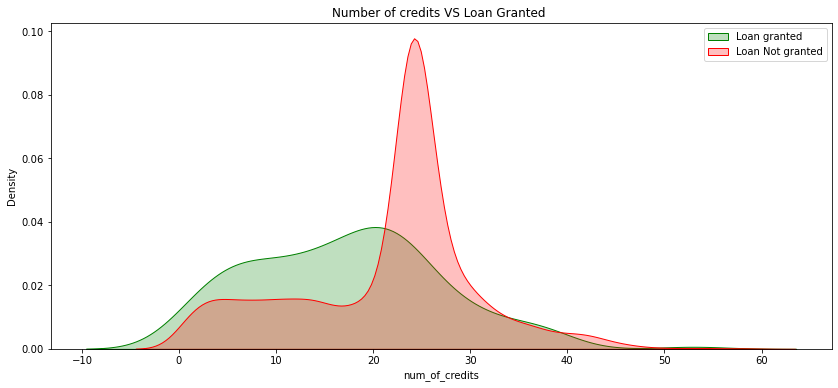

In [39]:
plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['num_of_credits'].mean(),shade = True,color = "g",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['num_of_credits'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('Number of credits VS Loan Granted ')
plt.legend()

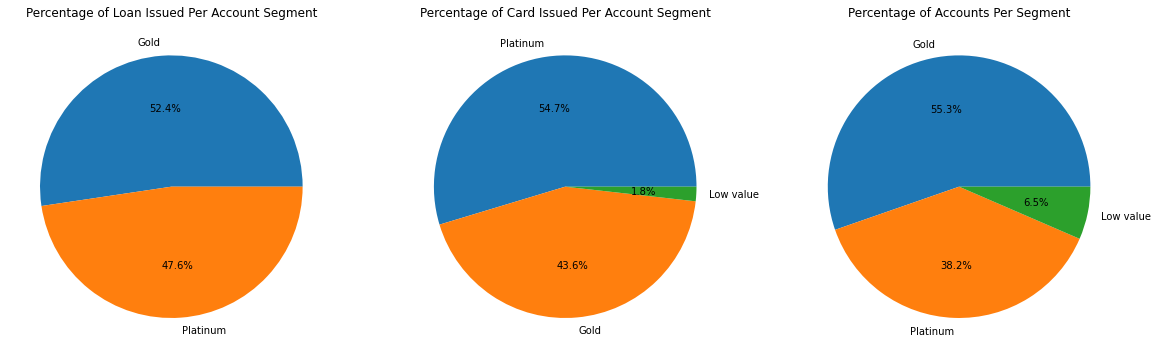

In [61]:
#Percentage of Loan and card issued per account Segment and the Accounts per segment

fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['account_segment'].value_counts()
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per Account Segment')
cnt_incometype = district_client_card_issued['account_segment'].value_counts()
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per Account Segment')
cnt_incometype = analysis_df['account_segment'].value_counts()
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per Segment')
plt.show()

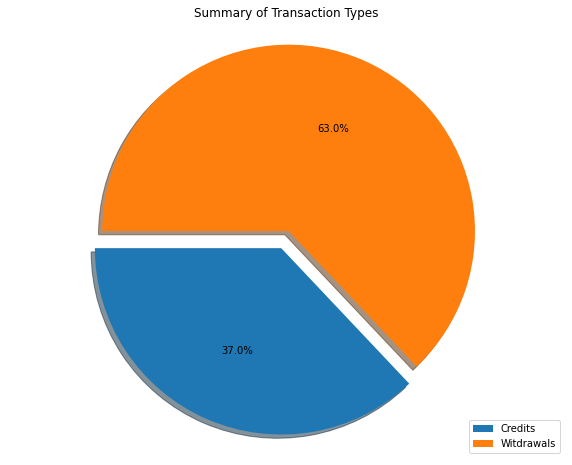

In [62]:
#Transaction Types Summary on the share of each transactions -  Credit and Withdrwals 


fig,ax = plt.subplots()
fig.set_size_inches(10,8,forward = True)
values = [analysis_df['num_of_credits'].mean(), analysis_df['num_of_withdrawals'].mean()]
ax.set_title('Summary of Transaction Types')
plt.pie(values,autopct ='%1.1f%%',shadow = True,startangle = 180,explode = (0.1,0))
plt.axis("equal")
fig.set_facecolor('white')
plt.legend(labels=('Credits','Witdrawals'))
plt.show()

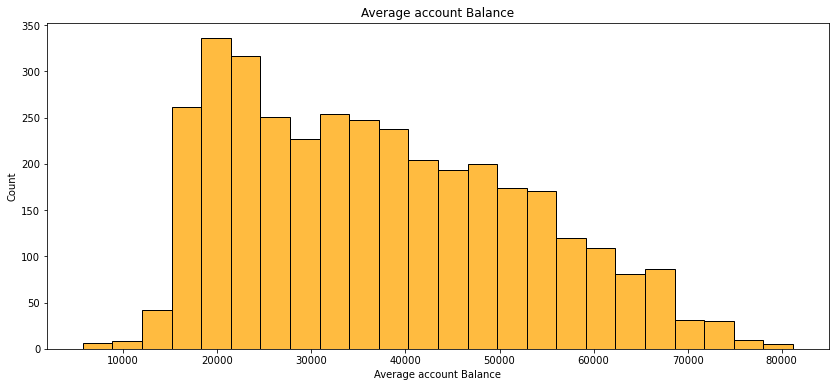

In [41]:
#avgbalance 


fig,ax = plt.subplots()
fig.set_size_inches(14,6,forward =True)
sns.histplot(analysis_df['trans_avgbalance'],color = 'orange')
plt.xlabel('Average account Balance')
ax.set_title('Average account Balance')
plt.show()

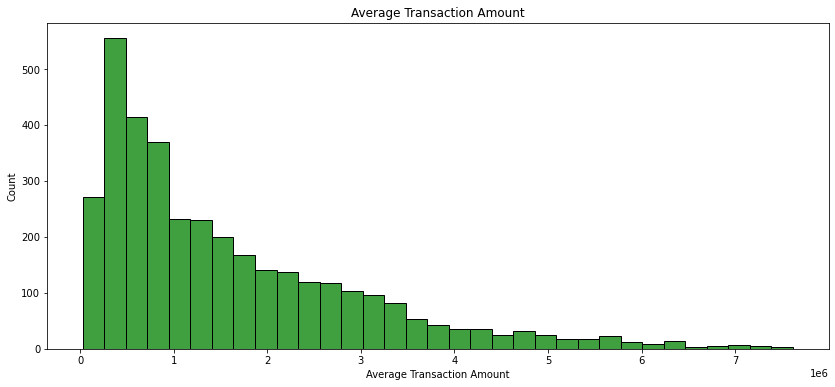

In [42]:
#Average Transaction Amount 


fig,ax = plt.subplots()

fig.set_size_inches(14,6,forward =True)
sns.histplot(analysis_df['total_trans_amount'],color = 'green')
plt.xlabel('Average Transaction Amount')
ax.set_title('Average Transaction Amount')
plt.show()

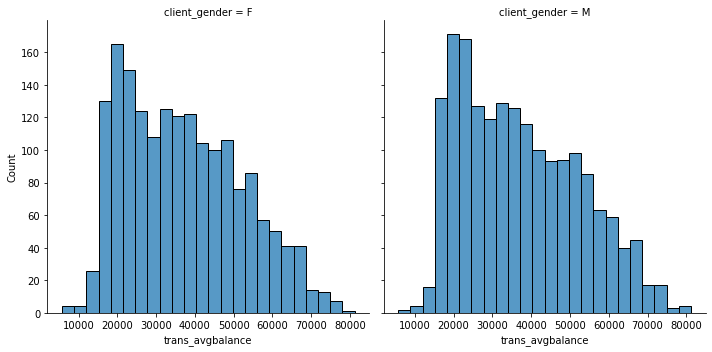

In [43]:
sns.displot(analysis_df, x="trans_avgbalance", col="client_gender")

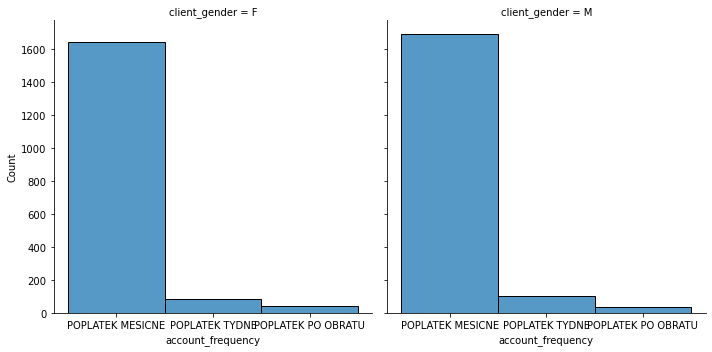

In [46]:
sns.displot(analysis_df, x="account_frequency", col="client_gender")

# DISTRICT 

In [47]:
district_client_card_issued = analysis_df[analysis_df['card_issued_97'] == 1]
district_client_loan_granted = analysis_df[analysis_df['loan_granted'] == 1]


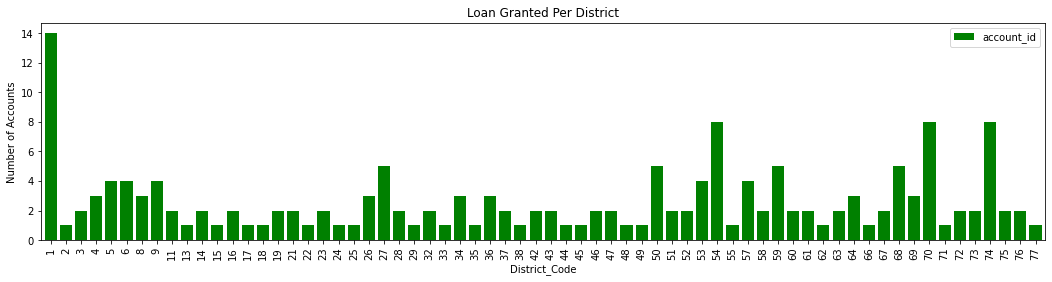

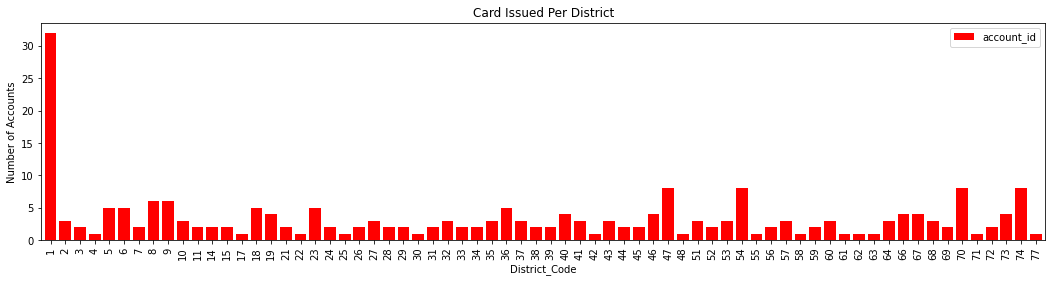

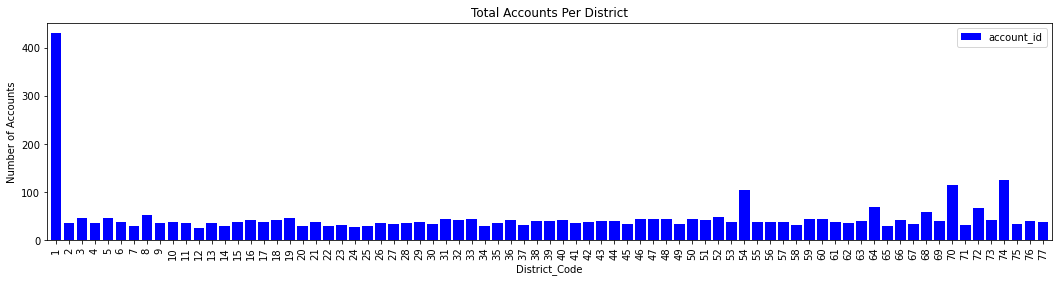

In [48]:
fig, ax = plt.subplots(figsize=(18,4))
ax = district_client_loan_granted.groupby('District_Code')['account_id'].count().plot.bar(color = 'g', 
                                                            width = 0.8, title = 'Loan Granted Per District',grid = False)
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Accounts")
ax.legend()

fig, ax1 = plt.subplots(figsize=(18,4))
ax1 = district_client_card_issued.groupby('District_Code')['account_id'].count().plot.bar(color = 'r',
                                                            width = 0.8, title = 'Card Issued Per District',grid = False)
ax1.set_xlabel("District_Code")
ax1.set_ylabel("Number of Accounts")
ax1.legend()

fig, ax2 = plt.subplots(figsize=(18,4))
ax2 = analysis_df.groupby('District_Code')['account_id'].count().plot.bar(color = 'b',
                                                            width = 0.8, title = 'Total Accounts Per District',grid = False)
ax2.set_xlabel("District_Code")
ax2.set_ylabel("Number of Accounts")
ax2.legend()

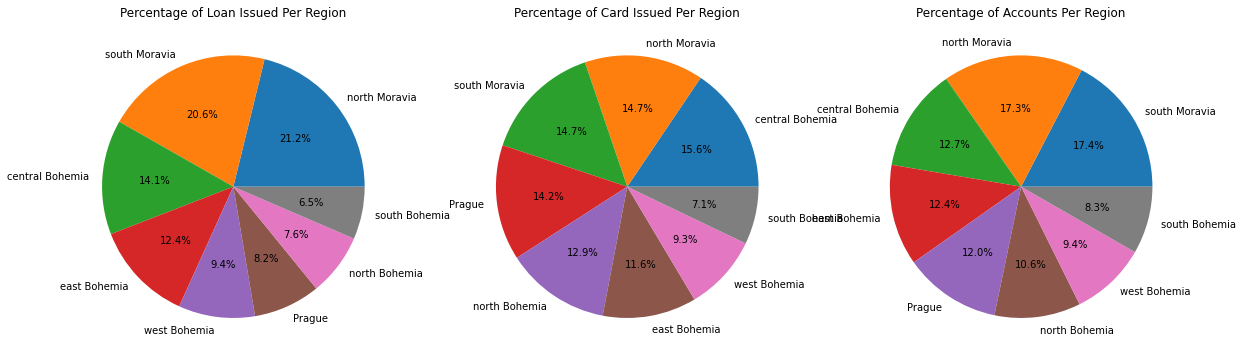

In [49]:
fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['Region'].value_counts()
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per Region')
cnt_incometype = district_client_card_issued['Region'].value_counts()
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per Region')
cnt_incometype = analysis_df['Region'].value_counts()
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per Region')
plt.show()

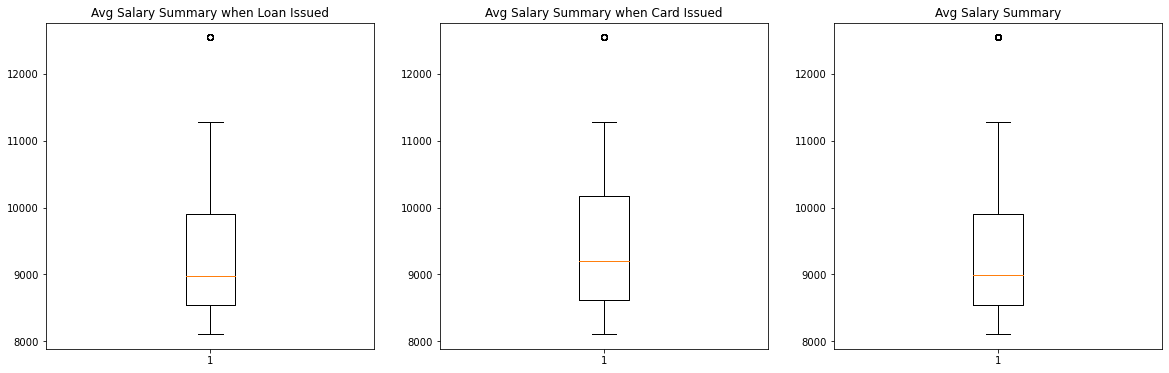

In [50]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['average_salary'])
ax[0].set_title('Avg Salary Summary when Loan Issued')
ax[1].boxplot(district_client_card_issued['average_salary'])
ax[1].set_title('Avg Salary Summary when Card Issued')
ax[2].boxplot(analysis_df['average_salary'])
ax[2].set_title('Avg Salary Summary')
plt.show()

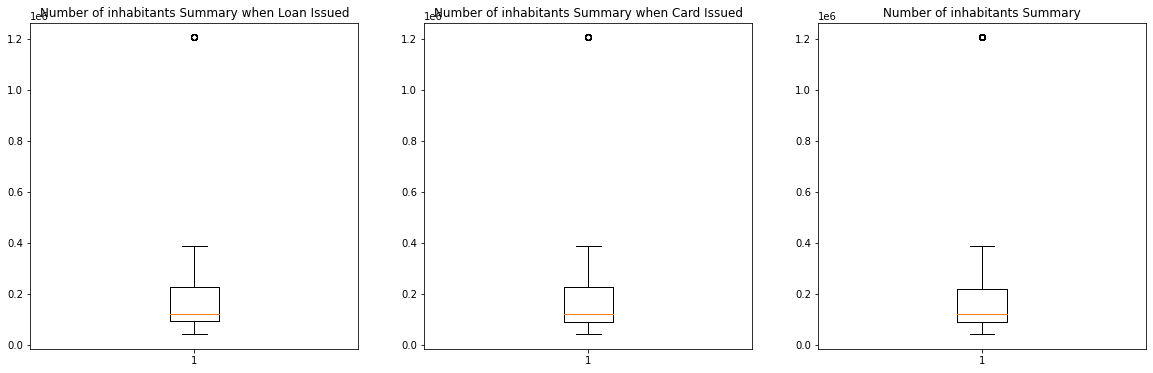

In [51]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['n_inhabitants'])
ax[0].set_title('Number of inhabitants Summary when Loan Issued')
ax[1].boxplot(district_client_card_issued['n_inhabitants'])
ax[1].set_title('Number of inhabitants Summary when Card Issued')
ax[2].boxplot(analysis_df['n_inhabitants'])
ax[2].set_title('Number of inhabitants Summary')
plt.show()

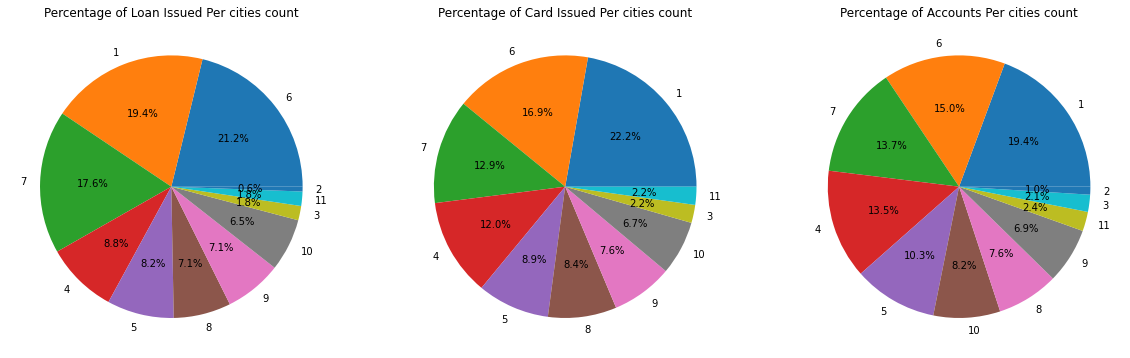

In [52]:
fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['n_cities'].value_counts(normalize=True)
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per cities count')
cnt_incometype = district_client_card_issued['n_cities'].value_counts(normalize=True)
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per cities count')
cnt_incometype = analysis_df['n_cities'].value_counts()
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per cities count')
plt.show()

Text(0, 0.5, 'Number of Accounts')

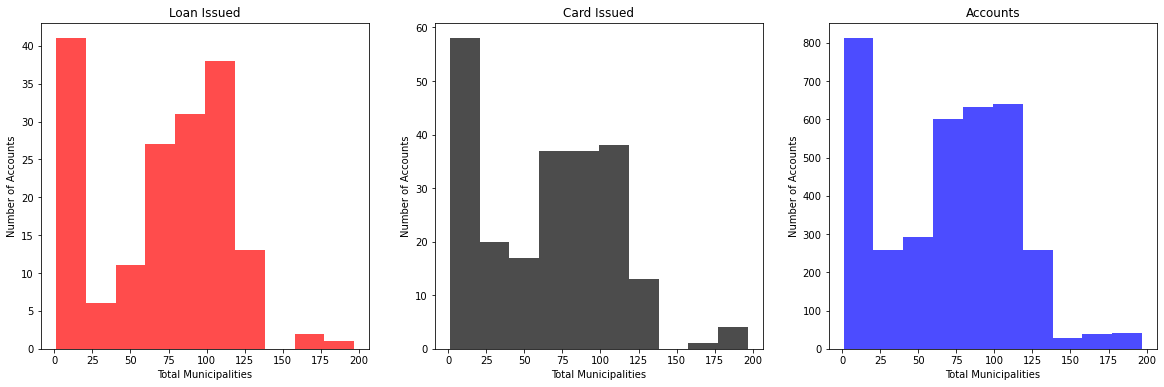

In [53]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].hist(district_client_loan_granted['total_municipalities'], bins=10, color='Red', alpha=0.7, label='total_municipalities')
ax[0].set_title('Loan Issued')  # Title
ax[0].set_xlabel('Total Municipalities')  # X label
ax[0].set_ylabel('Number of Accounts')  # Y label
ax[1].hist(district_client_card_issued['total_municipalities'], bins=10, color='Black', alpha=0.7, label='total_municipalities')
ax[1].set_title('Card Issued')  # Title
ax[1].set_xlabel('Total Municipalities')  # X label
ax[1].set_ylabel('Number of Accounts')  # Y label
ax[2].hist(analysis_df['total_municipalities'], bins=10, color='Blue', alpha=0.7, label='total_municipalities')
ax[2].set_title('Accounts')  # Title
ax[2].set_xlabel('Total Municipalities')  # X label
ax[2].set_ylabel('Number of Accounts')  # Y label

Text(0.5, 1.0, 'Number of Employed Population Summary')

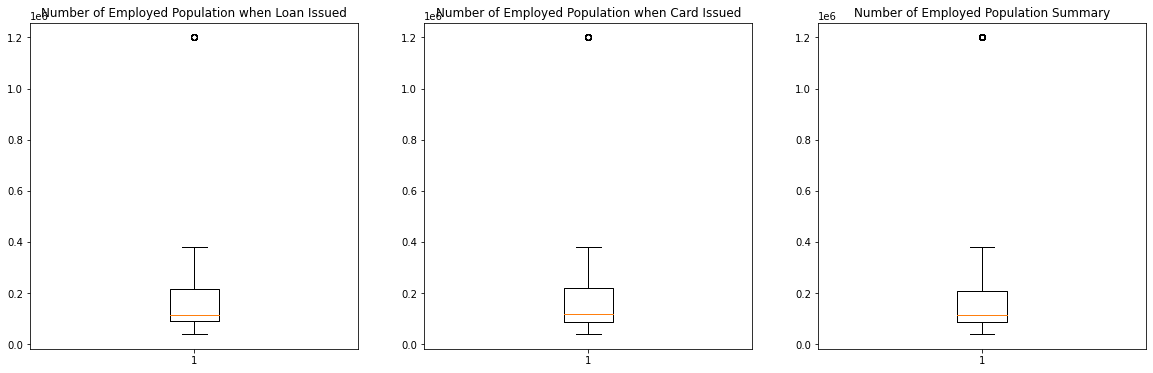

In [54]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['number_of_employed_population_96'])
ax[0].set_title('Number of Employed Population when Loan Issued')
ax[1].boxplot(district_client_card_issued['number_of_employed_population_96'])
ax[1].set_title('Number of Employed Population when Card Issued')
ax[2].boxplot(analysis_df['number_of_employed_population_96'])
ax[2].set_title('Number of Employed Population Summary')

Text(0, 0.5, 'Number of Employed Population')

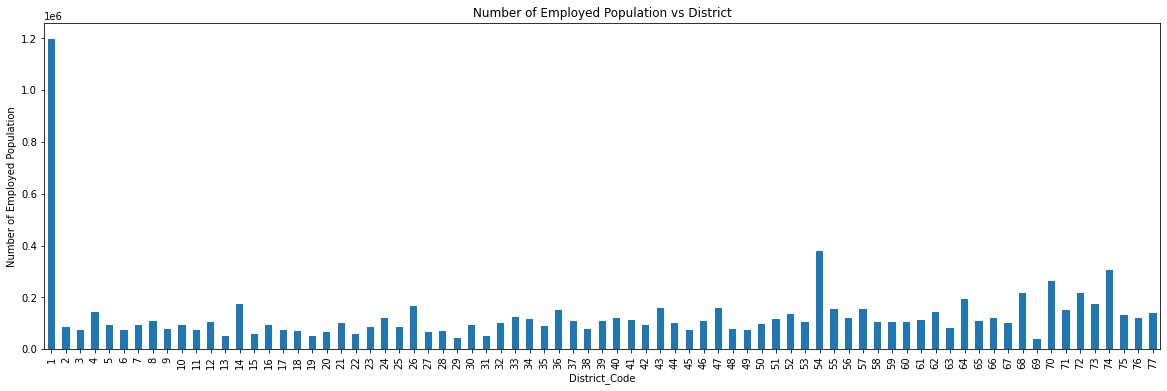

In [55]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['number_of_employed_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Population vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Employed Population")

Text(0, 0.5, 'Number of Employed Urban Population')

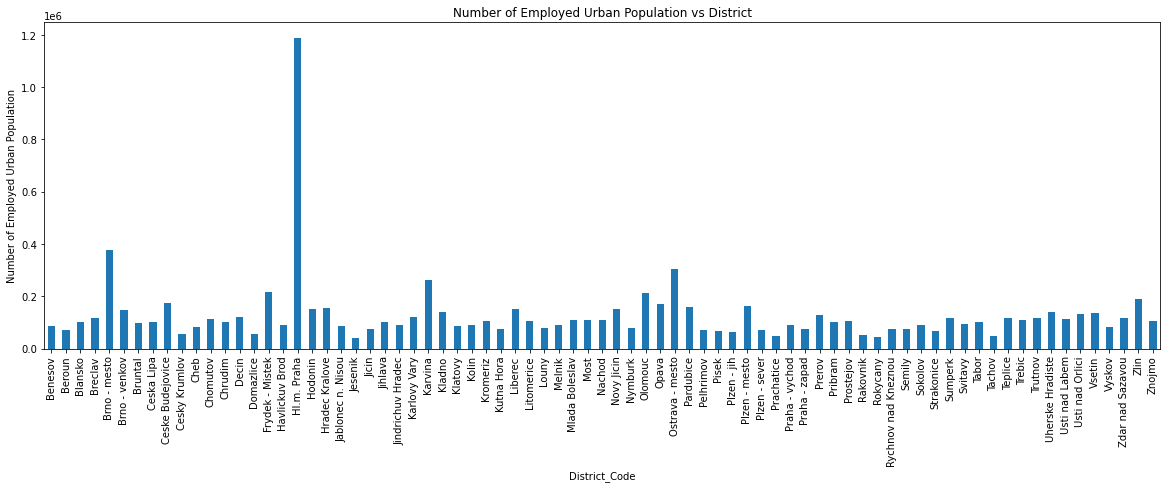

In [64]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Name')['number_of_employed_urban_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Urban Population vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Employed Urban Population")

Text(0, 0.5, 'Number of Employed Urban Population')

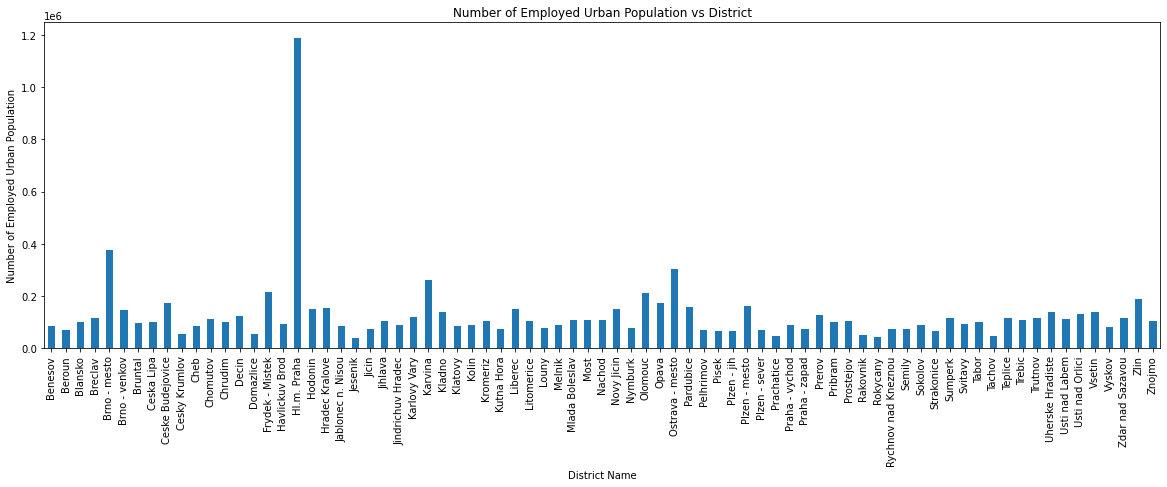

In [63]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Name')['number_of_employed_urban_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Urban Population vs District')
ax.set_xlabel("District Name")
ax.set_ylabel("Number of Employed Urban Population")